# Data Visualization

[Data-based Storytelling](./index.html)

Daniel Winkler (Institute for Retailing & Data Science)  
Stephan Fally (Department Marketing)

# Always Visualize!

## Processing numbers is hard

In [ ]:
library(datasauRus)
library(dplyr)
library(ggplot2)
library(gt)
library(stringr)
library(tidyr)

tab_ds_data <- datasaurus_dozen |>
  filter(dataset %in% c('dino', 'star')) |>
  group_by(dataset) |>
  mutate(id = 1:n()) |>
  pivot_wider(
    names_from = dataset, 
    values_from = c(x,y),
    names_vary = 'slowest'
  ) |>
  select(-id) |> 
  head(10) 
tab_ds_data |>  
  gt() |>
  cols_label(
    x_dino = 'x',
    y_dino = 'y',
    x_star = 'x',
    y_star = 'y'
  ) |>
  fmt_number() |>
  tab_spanner(
    label = "Dino",
    columns = ends_with("dino")
  ) |>
  cols_align('center') |> 
  tab_spanner(
    label = "Star",
    columns = ends_with("star")
  ) |> 
  tab_options(
    table.width = pct(85),
    table.font.size = 35) 

## Summary statistics are limiting

In [ ]:
datasaurus_dozen |>
  filter(dataset %in% c('dino', 'star')) |>
  group_by(dataset) |>
  summarize(
    avg_x = round(mean(x), digits = 2), 
    sd_x = round(sd(x), digits = 2),
    avg_y = round(mean(y), digits = 2),
    sd_y = round(sd(y), digits = 2),
    cor_xy = round(cor(x,y), digits = 2)
    ) |>
  mutate(dataset = str_to_title(dataset)) |> 
  gt() |>
  cols_label(
    avg_x = "Mean of x",
    sd_x = "Std. Dev. of x",
    avg_y = "Mean of y",
    sd_y = "Std. Dev. of y",
    cor_xy = "Correlation") |> 
  tab_options(
    table.width = pct(85),
    table.font.size = 35) 

``` r
datasaurus_dozen |>
  filter(dataset %in% c('dino', 'star')) |>
  mutate(dataset = str_to_title(dataset)) |>
  ggplot(aes(x = x, y = y)) +
  geom_point() +
  facet_wrap(~dataset) +
  theme_minimal() +
  theme(
    panel.grid=element_blank(),
    strip.text=element_text(size=35),
    axis.ticks=element_blank(),
    axis.text=element_blank(),
    axis.title=element_text(size=30)
  )
```

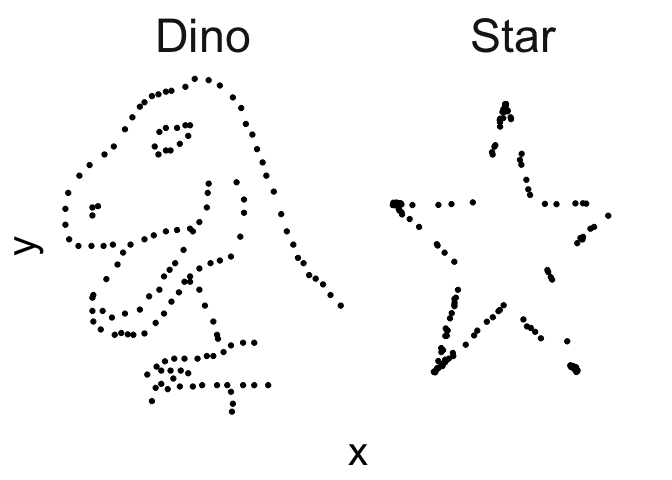

## Exercise

> **See beyond summary statistics**
>
> -   Select the `dataset`s `x_shape` & `bullseye` from the data.frame
>     `datasaurus_dozen`
> -   Create a table showing the following statistics for the two
>     `dataset`s:
>     -   mean of `x` and `y`,
>     -   standard deviation of `x` and `y`, and
>     -   covariance between `x` and `y`
> -   Create a plot showing the two `dataset`s

In [ ]:
library(datasauRus)
library(dplyr)
library(ggplot2)
library(gt)
library(stringr)
library(tidyr)
filter(datasaurus_dozen, dataset %in% c('x_shape', 'bullseye')) |>
  str(give.attr = FALSE)

tibble [284 × 3] (S3: tbl_df/tbl/data.frame)
 $ dataset: chr [1:284] "x_shape" "x_shape" "x_shape" "x_shape" ...
 $ x      : num [1:284] 38.3 35.8 32.8 33.7 37.2 ...
 $ y      : num [1:284] 92.5 94.1 88.5 88.6 83.7 ...

# Visual Channels

## Position is interpreted most accurately

-   Common y-axis alignment allows for accurate interpretation
-   Categories in the x-axis sorted by y-axis value
-   Position should encode the answer to the questions the audience asks

In [ ]:
library(palmerpenguins)
library(forcats)
fct_revfreq <- \(x) fct_rev(fct_infreq(x))
xx <- ggplot(penguins, aes(x = fct_revfreq(species))) +
  geom_bar(stat = "count") +
  scale_y_continuous(
    expand = expansion(c(0,0.05)),
    breaks = seq(10,150, by = 20)) + 
  labs(
    title = "Number of observations by species",
    x = "Penguin Species"
    ) +
  theme_bw() +
    theme(
    plot.title=element_text(size=35),
    axis.ticks.x=element_blank(),
    axis.text=element_text(size=30),
    axis.title=element_text(size=30)
  )

## Visualizing many categories (badly!)

-   What is the 5th smallest state?
-   Where does MO rank in terms of size?

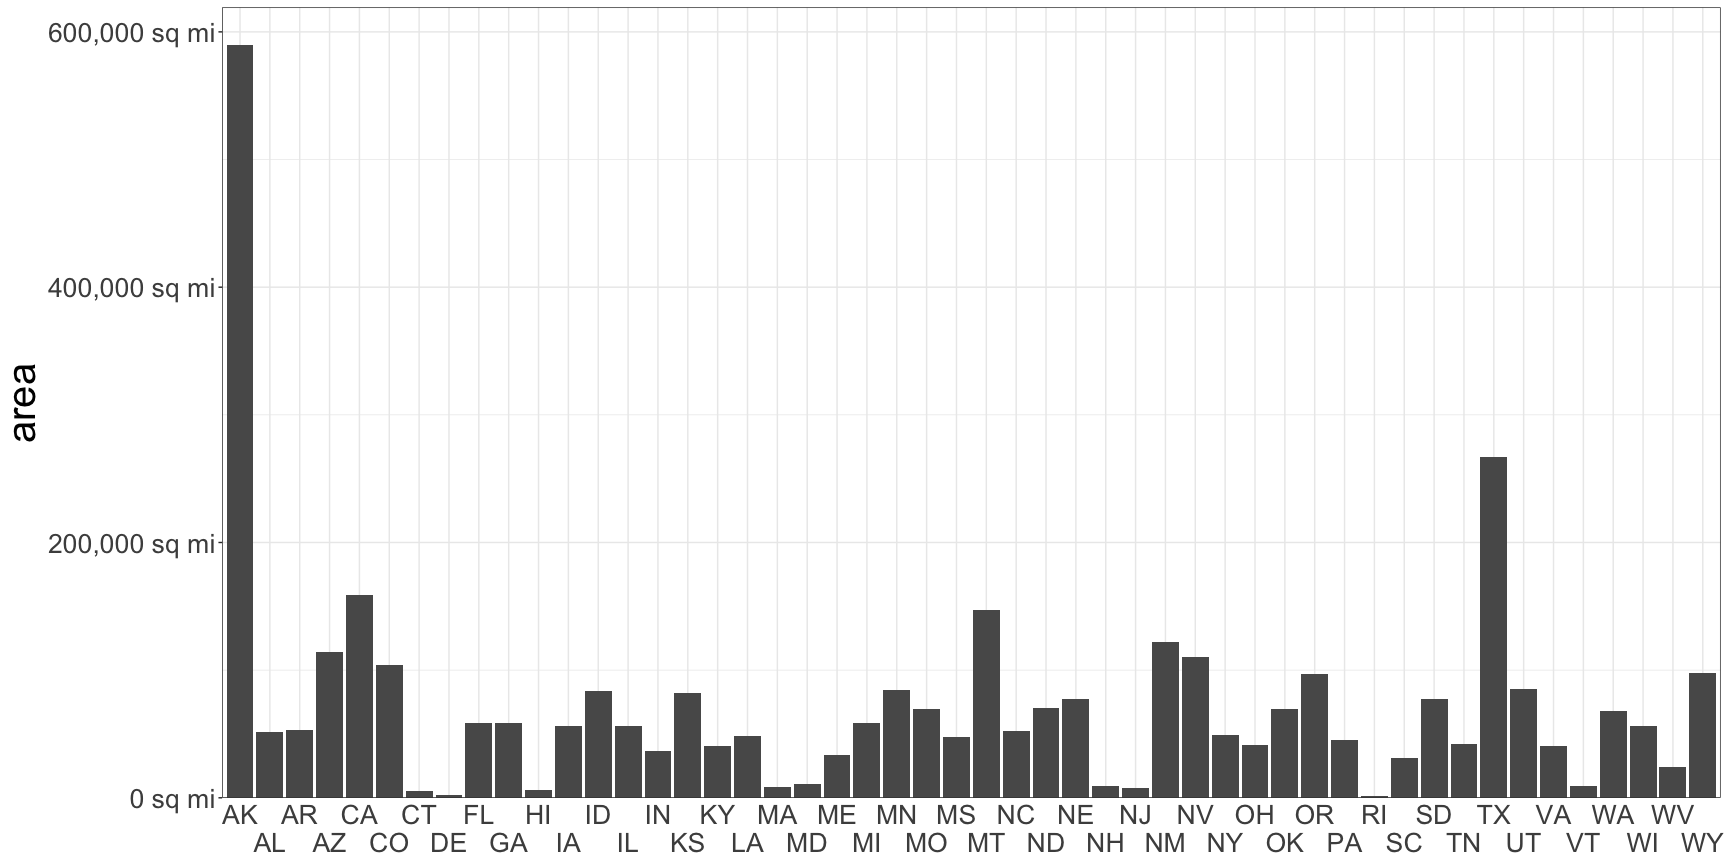

In [ ]:
library(datasets)
library(scales)
ggplot(data.frame(abb = state.abb, area = state.area), aes(x = abb, y = area)) +
  geom_bar(stat = 'identity') +
  scale_x_discrete(guide = guide_axis(n.dodge = 2)) +
  scale_y_continuous(
    expand = expansion(c(0,0.05)),
    labels = label_comma(suffix = " sq mi")) + 
  theme_bw() +
    theme(
    plot.title=element_text(size=35),
    axis.ticks.x=element_blank(),
    axis.text=element_text(size=20),
    axis.title=element_text(size=30),
    axis.title.x=element_blank()
  )

## Visualizing many categories

-   What is the 5th smallest state?
-   Where does MO rank in terms of size?

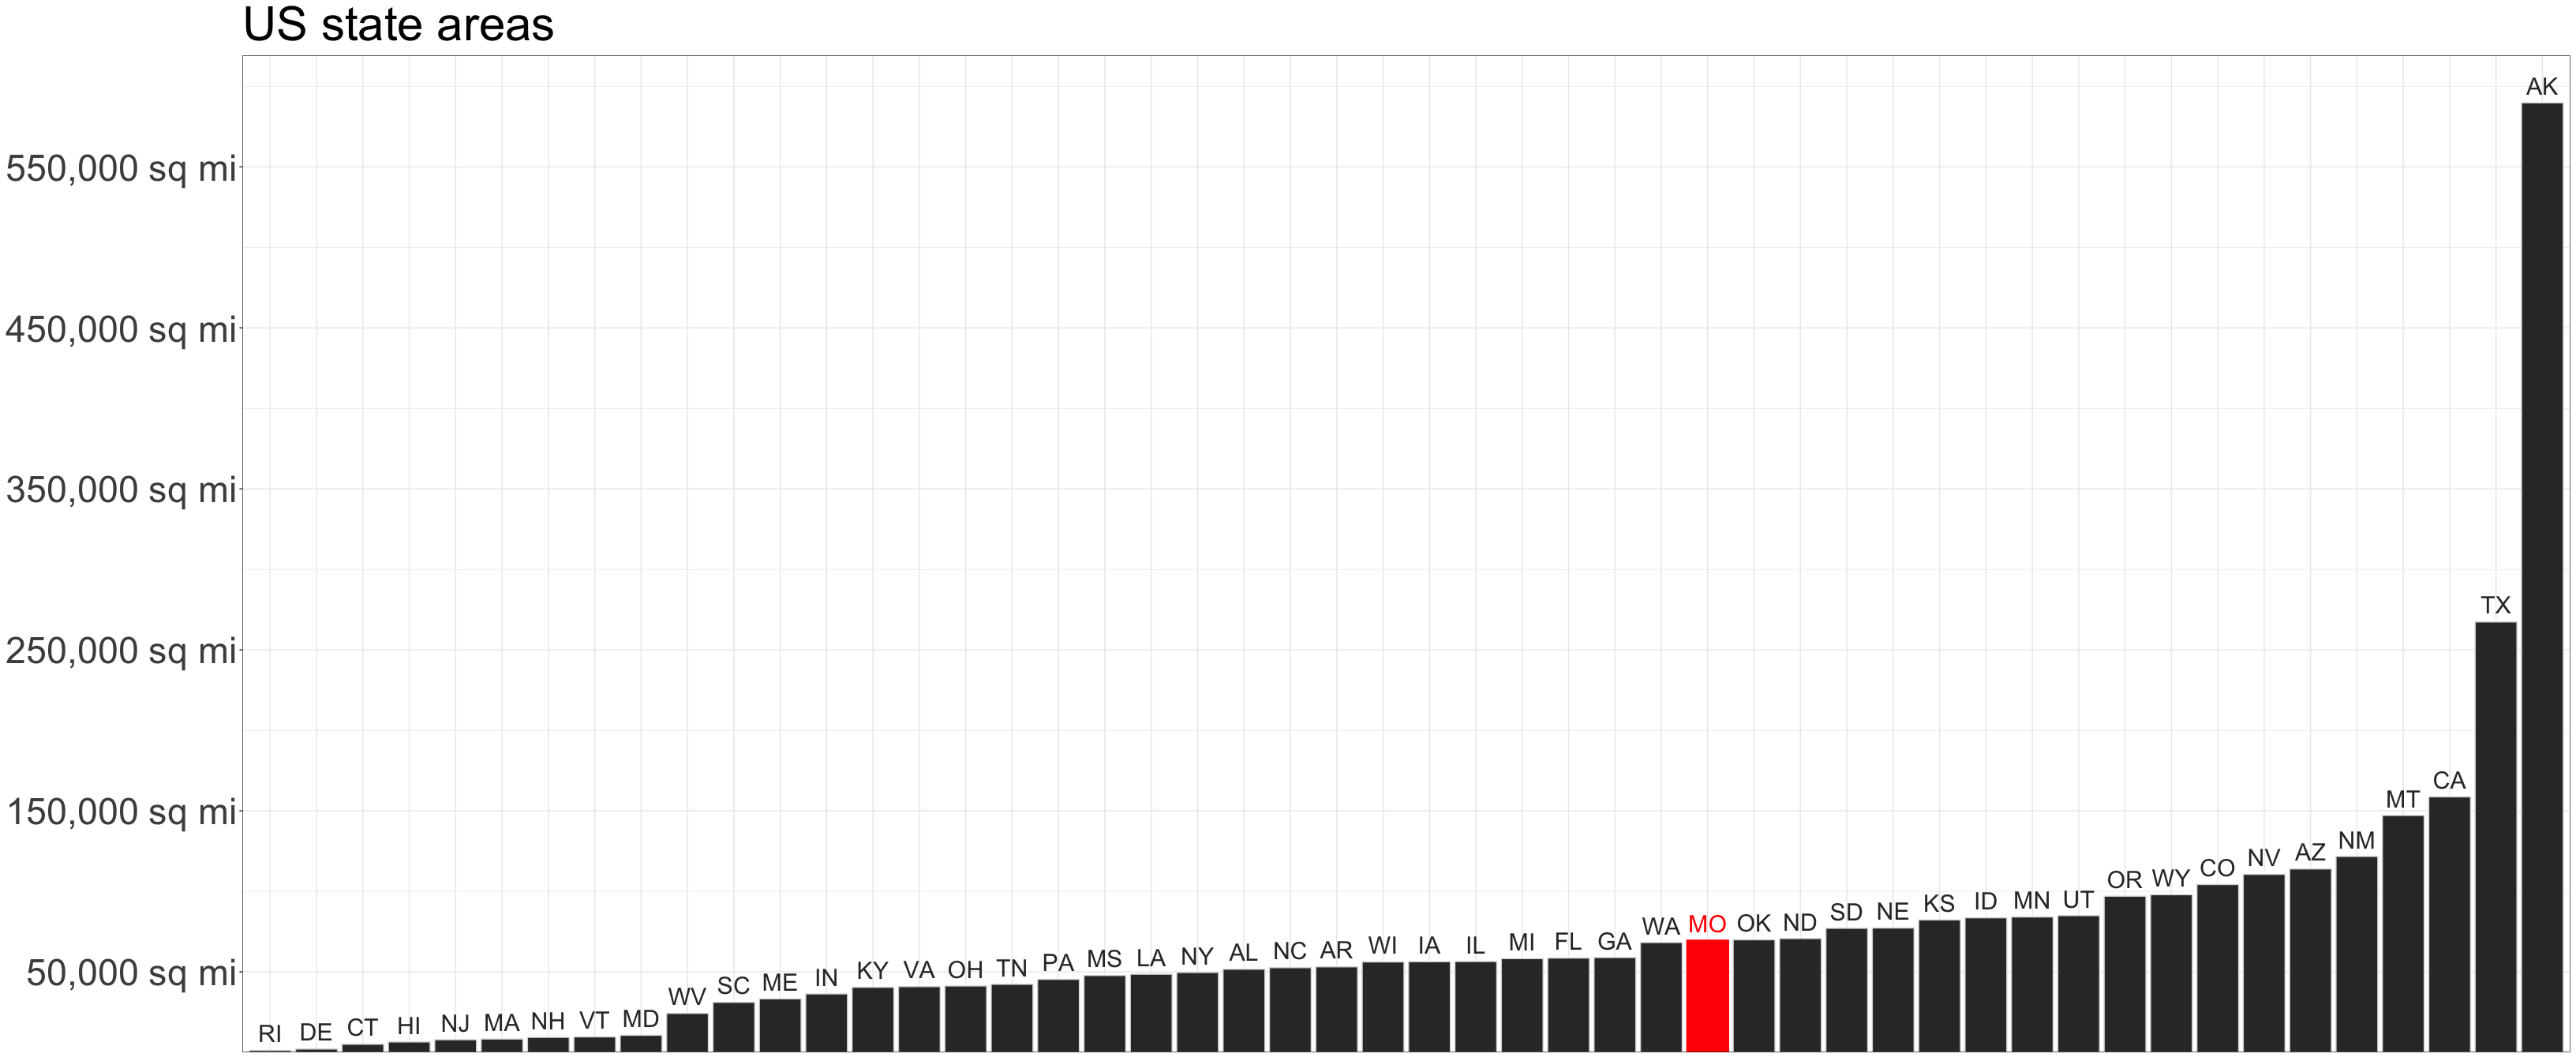

In [ ]:
library(colorspace)
state_areas <- data.frame(abb = state.abb, area = state.area, name = state.name) |>
  mutate(abb = fct_reorder(abb, area))
ggplot(state_areas, aes(x = abb, y = area, 
  color = abb == 'MO', fill = abb == 'MO')) +
  geom_bar(stat = 'identity') +
  scale_y_continuous(
    expand = expansion(c(0,0.05)), breaks = seq(50000,600000, by = 100000),
    labels = label_comma(suffix = " sq mi")) + 
  scale_color_manual(values = c('gray85', 'red')) +
  scale_fill_manual(values = c('gray20', 'red')) +
  geom_text(
    aes(label=abb, y = area), 
    position=position_dodge(width=0.9), 
    vjust=-0.50, 
    color = ifelse(state_areas$abb=='MO', 'red', 'gray20'),
    size = 8)+
  labs(title = "US state areas") +
  theme_bw() +
    theme(
    plot.title=element_text(size=45),
    axis.ticks.x=element_blank(),
    axis.text=element_text(size=35),
    axis.text.x=element_blank(),
    axis.title=element_blank(),
    legend.position='none'
  )

## Color intensity provides less accurate encoding

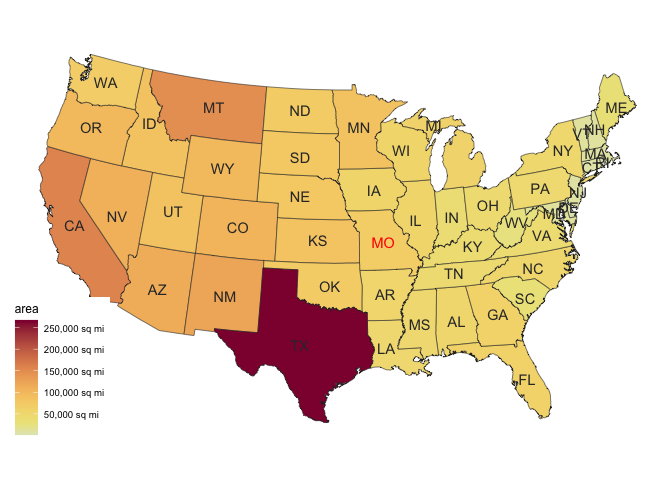

In [ ]:
library(maps)
library(sf)
library(colorspace)
us_map_data <- map("state", fill=TRUE, plot =FALSE)

usa <- st_as_sf(map("state", fill=TRUE, plot =FALSE))
usa <- merge(
  usa, 
  mutate(state_areas, ID = str_to_lower(name)),
  )
ggplot(usa) +
  geom_sf(aes(fill = area), color = "#2b2b2b", size=0.125) +
  coord_sf(crs = st_crs(6350)) +
  geom_sf_text(aes(label = abb, color = abb == 'MO')) +
  scale_color_manual(values = c('gray20', 'red')) +
  guides(color = 'none') + 
  ggthemes::theme_map() +
  scale_fill_continuous_sequential(
    palette = "Heat", 
    labels = label_comma(suffix = " sq mi") 
    )

## Colors are useful to mark targets for preattentive processing

-   Large scale spatial data needs to be “projected” to 2D
-   Most well known projection is
    [4326](https://spatialreference.org/ref/epsg/4326/) measured in
    degrees latitude and longitude
-   However, there are more accurate projections for specific regions
    e.g, [3035](https://spatialreference.org/ref/epsg/3035/) for
    EU+candidates

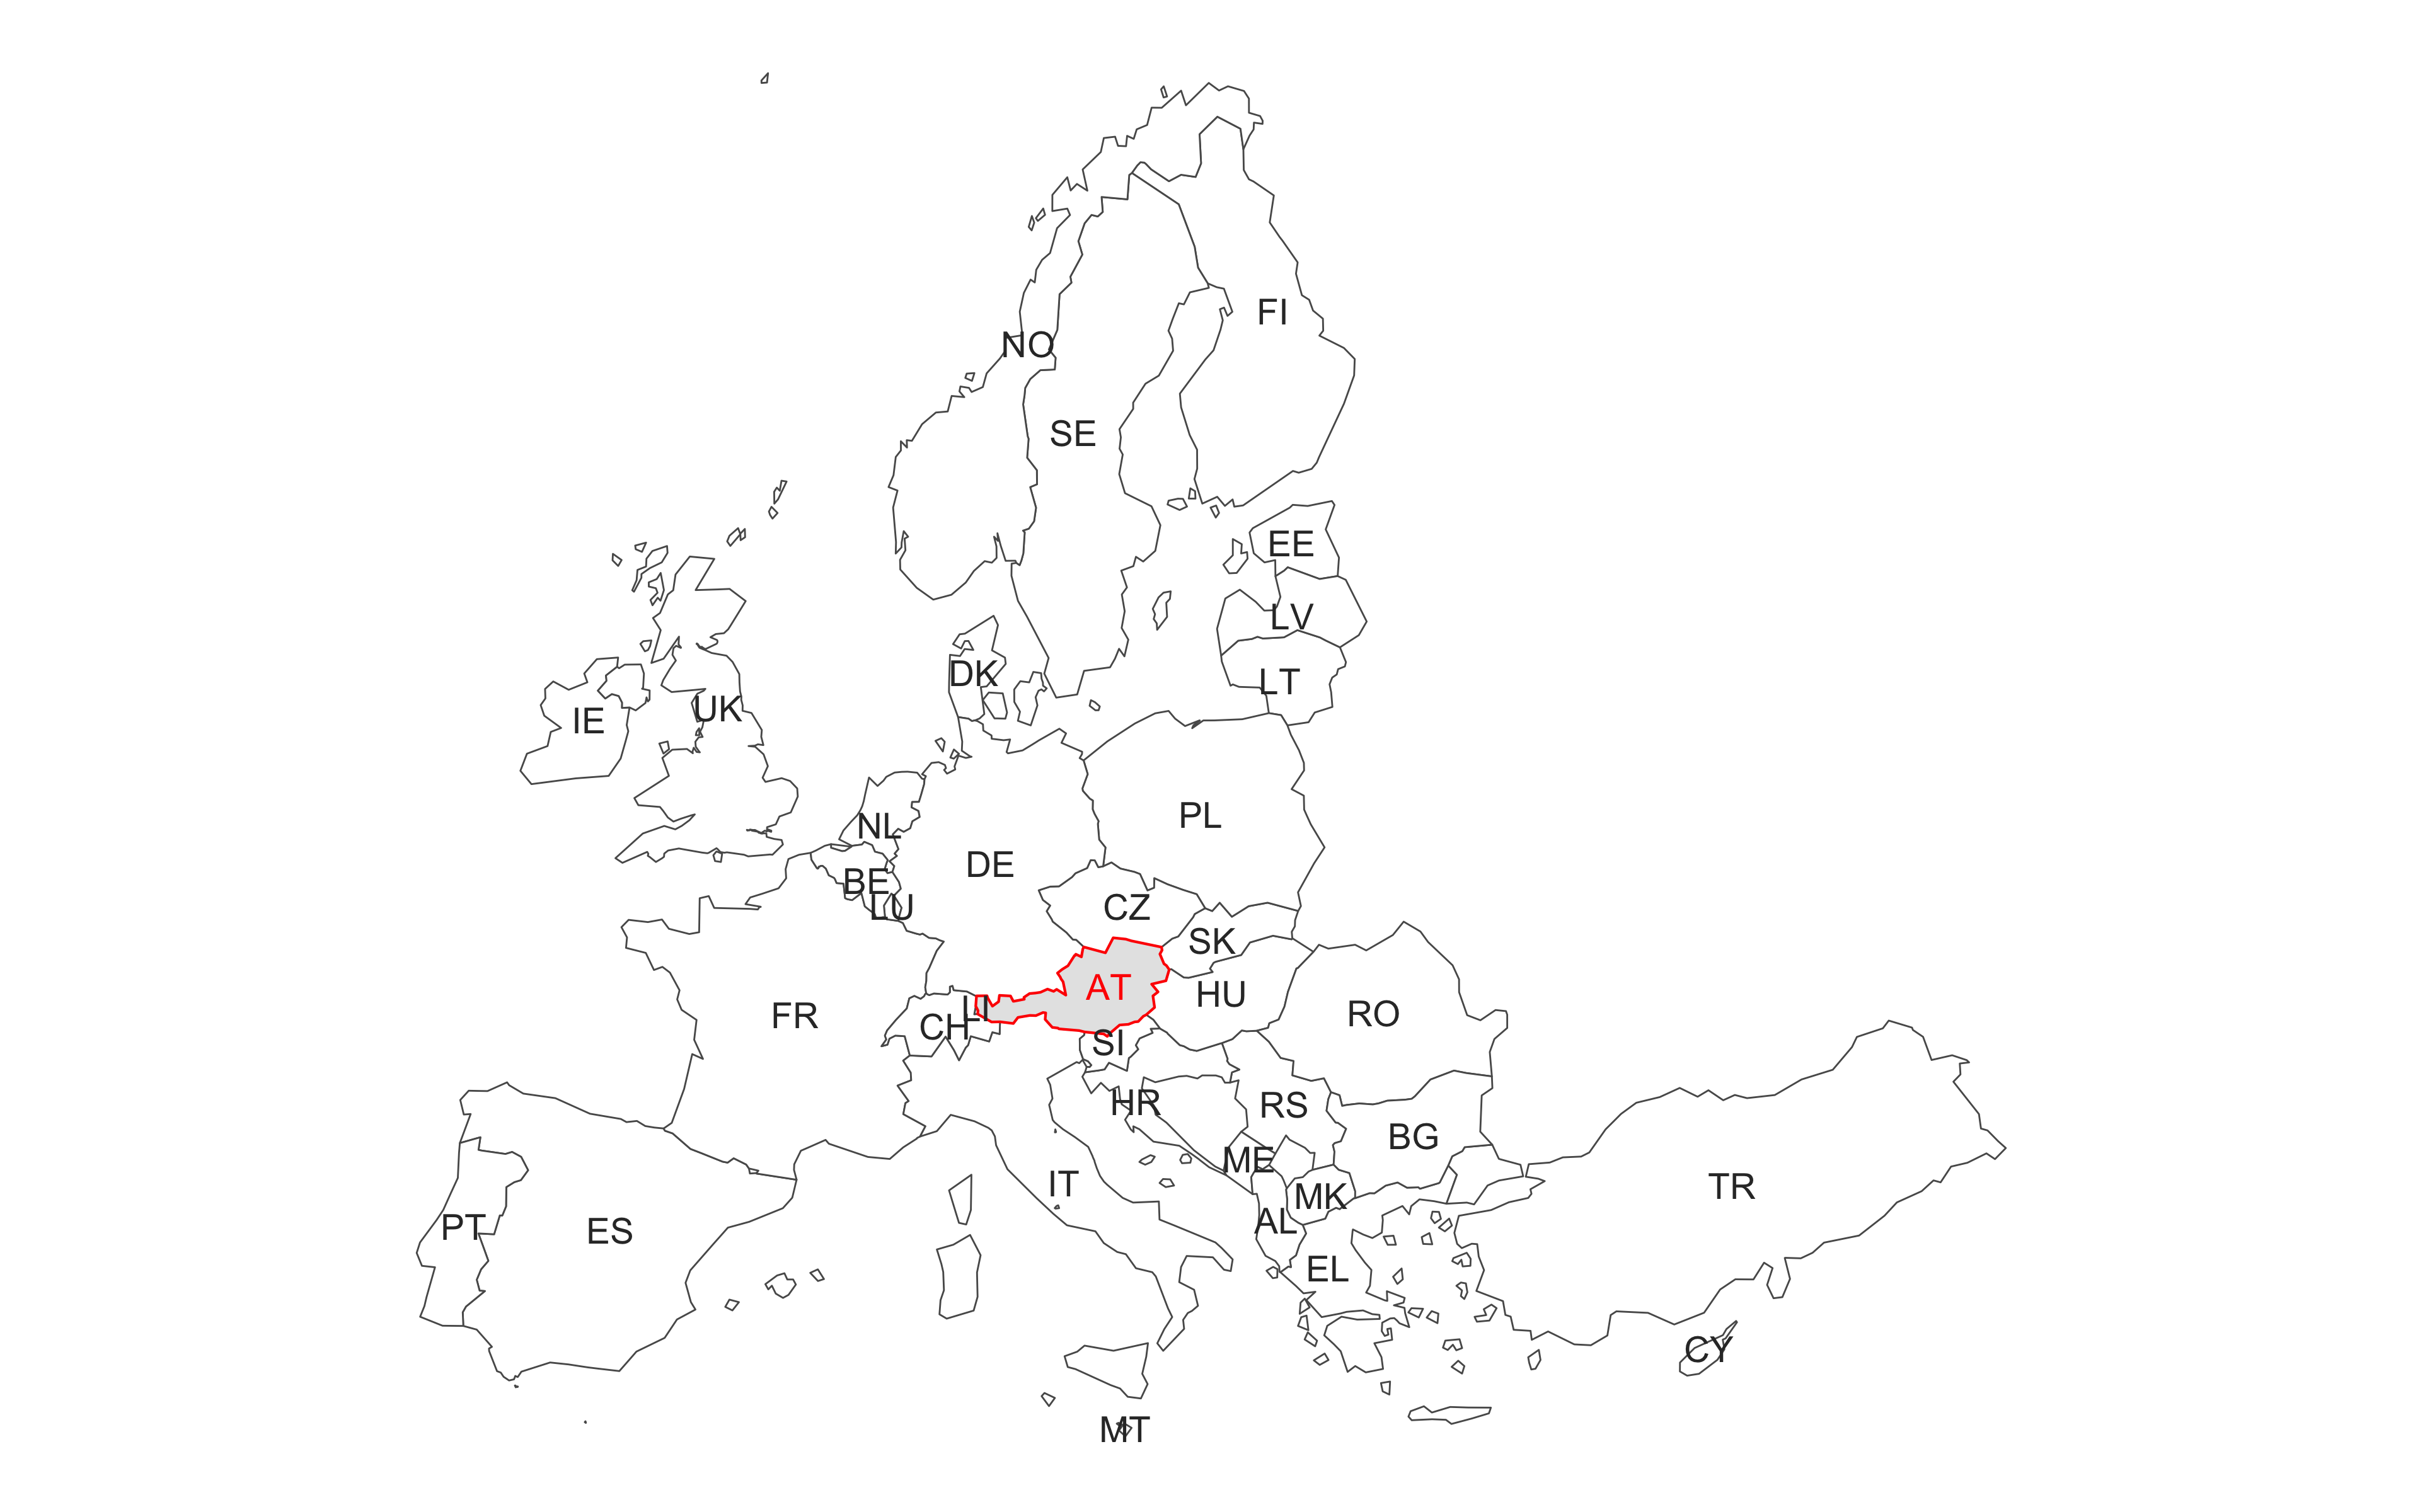

In [ ]:
## Example using "shapefile"
### e.g. for EU download here https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts
eu <- st_read("data/NUTS_RG_60M_2021_3035.shp/", quiet = TRUE)
eu0 <- filter(eu, LEVL_CODE == 0)
## Transform to longitude and latitude
eu0 <- eu0 |> st_transform(4326)
eu0_box <- eu0 |> st_bbox()
eu0_box <- eu0_box + c(50, 20, 0, -10)
ggplot(st_crop(eu0, eu0_box))+ 
  geom_sf(fill = 'white', lwd = 1) +
  geom_sf(data = filter(eu0, CNTR_CODE == 'AT'), color = 'red', lwd =1.5) + 
  coord_sf(crs = st_crs(3035)) +
  geom_sf_text(aes(label = CNTR_CODE, color = CNTR_CODE == 'AT'), size = 15) +
  scale_color_manual(values = c('gray20', 'red')) +
  guides(color = 'none') + 
  ggthemes::theme_map(base_size = 12) 

# Mapping visual ratios

If including $0$ in the y-axis would make the graph unreadable include
additional annotation Or visualize the difference.